In [1]:
import pickle
import numpy as np

with open('/Users/owenburns/workareas/cavrel-platooning/missions/datapoints/drop0candidate.pkl', 'rb') as f:
    special_00 = pickle.load(f, encoding='latin1') # latin1 is essential for loading python2 pickle files. Not necessary for python3 files

with open('/Users/owenburns/workareas/cavrel-platooning/final_data/straight_00_drop.pkl', 'rb') as f:
    data_00 = pickle.load(f, encoding='latin1') # latin1 is essential for loading python2 pickle files. Not necessary for python3 files

with open('/Users/owenburns/workareas/cavrel-platooning/final_data/straight_10_drop.pkl', 'rb') as f:
    data_10 = pickle.load(f, encoding='latin1') # latin1 is essential for loading python2 pickle files. Not necessary for python3 files

with open('/Users/owenburns/workareas/cavrel-platooning/final_data/straight_20_drop.pkl', 'rb') as f:
    data_20 = pickle.load(f, encoding='latin1') # latin1 is essential for loading python2 pickle files. Not necessary for python3 files

with open('/Users/owenburns/workareas/cavrel-platooning/final_data/straight_30_drop.pkl', 'rb') as f:
    data_30 = pickle.load(f, encoding='latin1') # latin1 is essential for loading python2 pickle files. Not necessary for python3 files

with open('/Users/owenburns/workareas/cavrel-platooning/final_data/straight_40_drop.pkl', 'rb') as f:
    data_40 = pickle.load(f, encoding='latin1') # latin1 is essential for loading python2 pickle files. Not necessary for python3 files

with open('/Users/owenburns/workareas/cavrel-platooning/final_data/straight_50_drop.pkl', 'rb') as f:
    data_50 = pickle.load(f, encoding='latin1') # latin1 is essential for loading python2 pickle files. Not necessary for python3 files

with open('/Users/owenburns/workareas/cavrel-platooning/final_data/straight_60_drop.pkl', 'rb') as f:
    data_60 = pickle.load(f, encoding='latin1') # latin1 is essential for loading python2 pickle files. Not necessary for python3 files

special_00 = [np.array(car) for car in zip(*special_00)]
cars_00 = [np.array(car) for car in zip(*data_00)]
cars_10 = [np.array(car) for car in zip(*data_10)]
cars_20 = [np.array(car) for car in zip(*data_20)]
cars_30 = [np.array(car) for car in zip(*data_30)]
cars_40 = [np.array(car) for car in zip(*data_40)]
cars_50 = [np.array(car) for car in zip(*data_50)]
cars_60 = [np.array(car) for car in zip(*data_60)]

cars = [cars_00, cars_10, cars_20, cars_30, cars_40, cars_50, cars_60]

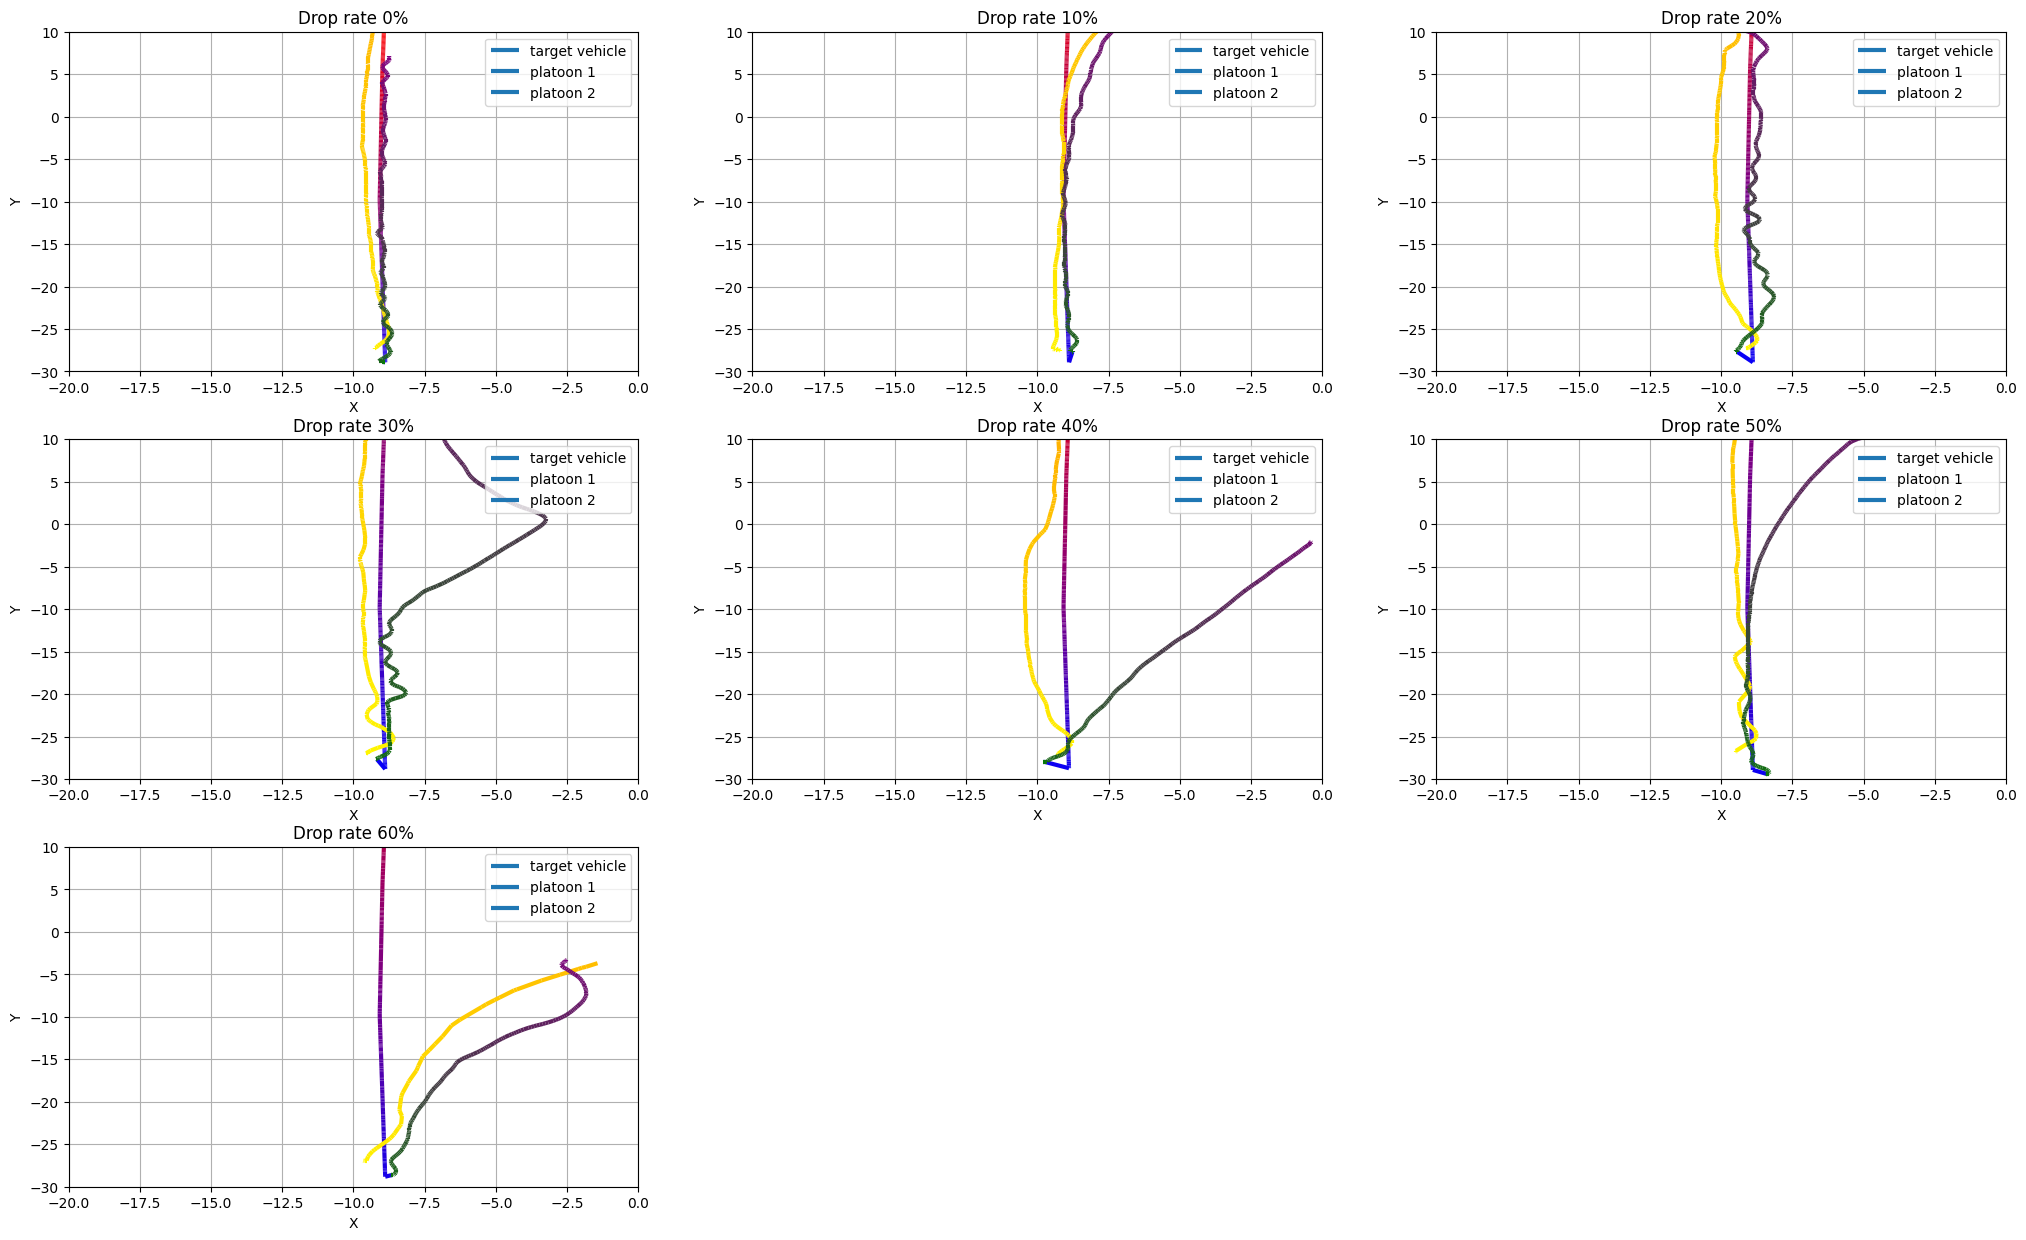

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.legend_handler import HandlerBase
from matplotlib.offsetbox import OffsetImage

def plot_gradient_lines(ax, xs, ys, colors, label=None):
    # Prepare points for line collection
    points = np.array([xs, ys]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    # Create a continuous linear colormap
    cmap = LinearSegmentedColormap.from_list("mycmap", colors)

    # Setting up the LineCollection
    lc = LineCollection(segments, cmap=cmap, linewidth=3)
    # Set the values used for colormapping
    lc.set_array(np.linspace(0, 1, len(xs)))
    lc.set_label(label)

    # Adding the collection to the plot
    # plt.gca().add_collection(lc)
    ax.add_collection(lc)

fig, ax = plt.subplots(3, 3, figsize=(25, 15))

figs_map = {
    0: (0, 0),
    1: (0, 1),
    2: (0, 2),
    3: (1, 0),
    4: (1, 1),
    5: (1, 2),
    6: (2, 0),
}

for count, car in enumerate(cars):
    xs1 = car[0][:, 0]
    ys1 = car[0][:, 1]

    xs2 = car[1][:, 0]
    ys2 = car[1][:, 1]

    xs3 = car[2][:, 0]
    ys3 = car[2][:, 1]

    row, col = figs_map[count]
    drop_rate = int(10*count)

    ax[row, col].set_title(f'Drop rate {drop_rate}%')

    # Plot each line with gradients
    plot_gradient_lines(ax[row, col], xs1, ys1, ["blue", "red"], label='target vehicle')
    plot_gradient_lines(ax[row, col], xs2, ys2, ["yellow", "orange"], label='platoon 1')
    plot_gradient_lines(ax[row, col], xs3, ys3, ["green", "purple"], label='platoon 2')
    ax[row, col].set_xlim(-20, 0)
    ax[row, col].set_ylim(-30, 10)
    ax[row, col].legend(loc='best')
    ax[row, col].set_xlabel('X')
    ax[row, col].set_ylabel('Y')
    ax[row, col].grid(True)

fig.delaxes(ax[2, 1])
fig.delaxes(ax[2, 2])
plt.show()

In [ ]:
from typing import List
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
from matplotlib.text import Annotation
from matplotlib.lines import Line2D
from IPython.display import HTML
import matplotlib
import math
import json
import numpy as np
matplotlib.rcParams['animation.embed_limit'] = 2**128
EARTH_RADIUS = 6371e3
DUE_EAST = 90
BROADCAST_INTERVAL = 0.1

with open("/Users/owenburns/workareas/cavrel-platooning/missions/tracks/garage_loop.json", 'r') as f:
    track = json.load(f)

with open("/Users/owenburns/workareas/cavrel-platooning/missions/datapoints/py3_1_parking_loop_21_58_14_LINE.pkl", 'rb') as l:
    lines = pickle.load(l)

with open("/Users/owenburns/workareas/cavrel-platooning/missions/datapoints/py3_1_parking_loop_21_58_14_CLOSEST.pkl", 'rb') as p:
    closest_points = pickle.load(p)

center_latitude = track['center']['lat']
center_longitude = track['center']['lon']
center_orientation = DUE_EAST

def coords_to_local(target_lat, target_lon):
    # Convert lat, lon to radians
    target_lat_rad, target_lon_rad = math.radians(target_lat), math.radians(target_lon)
    current_lat_rad, current_lon_rad = math.radians(center_latitude), math.radians(center_longitude)

    x = EARTH_RADIUS * (target_lon_rad - current_lon_rad) * math.cos((current_lat_rad + target_lat_rad) / 2)
    y = EARTH_RADIUS * (target_lat_rad - current_lat_rad)

    angle = math.radians(center_orientation - DUE_EAST)
    qx = math.cos(angle) * x - math.sin(angle) * y
    qy = math.sin(angle) * x + math.cos(angle) * y
    return qx, qy

def heading_velocity_to_components(heading, velocity):
    # Convert heading (degrees) to radians
    heading_rad = math.radians(heading)
    # Calculate the x and y components of the velocity
    vx = velocity * math.sin(heading_rad)
    vy = velocity * math.cos(heading_rad)
    return vx, vy

def vector_to_arrow(vector):
    x, y = vector[0], vector[1]
    vx, vy = heading_velocity_to_components(vector[2], vector[3])
    return (x, y, vx, vy)

# set up the plot and plot the runing track
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(autoscale_on=False, xlim=(-100, 100), ylim=(-100, 100))
ax.plot(xs1, ys1, 'k-', label='Track Path')  # green dots connected by lines
ax.plot(xs1[0], ys1[0], 'yo', label='Start/End Point')
ax.set_aspect('equal')

ego_vectors = np.array(cars[1])
target_vectors = np.array(cars[0])

to_delete = np.random.choice(np.arange(ego_vectors.shape[0]), size=54, replace=False)

ego_vectors = np.delete(ego_vectors, to_delete, axis=0)
print(ego_vectors.shape)
target_vectors = np.delete(target_vectors, to_delete, axis=0)

ex, ey, edx, edy = vector_to_arrow(ego_vectors[0])
# v, h = ego_targets[0]
# vacc, hacc = ego_controls[0]
tx, ty, tdx, tdy = vector_to_arrow(target_vectors[0])
xsl, ysl = lines[0] # x0_opt, y0_opt, dx_opt, dy_opt = lines[0]
closest = closest_points[0]
ego_arrow = patches.Arrow(ex, ey, edx, edy, width=2, fc='red', ec='red')
target_arrow = patches.Arrow(tx, ty, tdx, tdy, width=2, fc='blue', ec='blue')
ego_text = Annotation(f"dx: {edx:.2f}, dy: {edy:.2f}", xy=(ex, ey), xytext=(ex, ey))#\nv: {v}, h: {h}
# target_text = Annotation(f"dx: {tdx:.2f}, dy: {tdy:.2f}", xy=(tx, ty), xytext=(tx, ty))
line = Line2D(xsl, ysl, color='green') # line = Line2D([x0_opt, closest[0]], [y0_opt, closest[1]], color='green')
pt = Line2D([closest[0]], [closest[1]], marker='o', color='green') # pt = Line2D([closest[0]], [closest[1]], marker='o', color='green')


def init_func() -> list[patches.Arrow]:
    print('init_func')
    ax.add_patch(ego_arrow)
    ax.add_patch(target_arrow)
    ax.add_artist(ego_text)
    # ax.add_artist(target_text)
    ax.add_artist(line)
    ax.add_artist(pt)
    return ego_arrow, target_arrow, ego_text#, target_text

def func(frame, *fargs) -> list[patches.Arrow]:
    global ego_arrow, target_arrow, ego_text, pt#, target_text, line, pt

    ax.patches[ax.patches.index(ego_arrow)].remove()
    ax.patches[ax.patches.index(target_arrow)].remove()

    _, _, e_heading, _ = ego_vectors[frame]
    _, _, t_heading, _ = target_vectors[frame]
    # v, h = ego_targets[frame]
    ex, ey, edx, edy = vector_to_arrow(ego_vectors[frame])
    tx, ty, tdx, tdy = vector_to_arrow(target_vectors[frame])
    ego_arrow = patches.Arrow(ex, ey, edx*BROADCAST_INTERVAL, edy*BROADCAST_INTERVAL, width=2, fc='red', ec='red')
    target_arrow = patches.Arrow(tx, ty, tdx*BROADCAST_INTERVAL, tdy*BROADCAST_INTERVAL, width=2, fc='blue', ec='blue')
    ego_text.set_text(f"dx: {edx*BROADCAST_INTERVAL:.2f}, dy: {edy*BROADCAST_INTERVAL:.2f}, heading: {e_heading:.2f}")#\nv: {v:.2f}, t_h: {h:.2f}")#\naccx: {accx:.2f}, accy: {accy:.2f}")
    ego_text.set_position((ex, ey))
    # target_text.set_text(f"dx: {tdx*broadcast_int:.2f}, dy: {tdy*broadcast_int:.2f}, heading: {t_heading:.2f}")
    # target_text.set_position((tx, ty))
    ax.add_patch(ego_arrow)
    ax.add_patch(target_arrow)

    xsl, ysl = lines[frame]# x0_opt, y0_opt, dx_opt, dy_opt = lines[frame]
    closest = closest_points[frame]
    line.set_data(xsl, ysl) # line.set_data([x0_opt, closest[0]], [y0_opt, closest[1]])
    pt.set_data([closest[0]], [closest[1]])

    return ego_arrow, target_arrow, ego_text#, target_text

ax.set_xlabel('Meters East of Center')
ax.set_ylabel('Meters North of Center')
ax.set_title('Vehicle Path and Vectors')
ax.legend()
ax.grid()

# Create animation
ani = FuncAnimation(fig, func, range(min(len(ego_vectors), len(target_vectors))), init_func, blit=True, interval=50) # Adjust interval as needed
HTML(ani.to_jshtml())

# TODO: fix issue with cubic spline controller that the car follows the point next to it then the line is close to
# vertical and thus swoops around. do this by constraining the distance over which the spline is searchable to the maximum distance
# the ego vehicle is away from a platoon vehicle

In [3]:
# plot all car velocities over time
time = np.linspace(0, 0.1*len(xs1), len(xs1))
plt.figure(figsize=(10, 6))

car0_v = cars[0][:,3]
car1_v = cars[1][:,3]
car2_v = cars[2][:,3]

plt.plot(time, car0_v, label='target vehicle')
plt.plot(time, car1_v, label='platoon 1')
plt.plot(time, car2_v, label='platoon 2')
plt.legend()
plt.title('Velocity Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.grid(True)
plt.show()
# note: stop and start behavious b4 5th trial is bc lead vehicle kept catching up. Once we were dropping half the messages it always thought it was still behind so it never stopped

TypeError: list indices must be integers or slices, not tuple

<Figure size 1000x600 with 0 Axes>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Assuming cars is a list of numpy arrays where each array corresponds to car data
# and xs1 is defined to provide the length

time = np.linspace(0, 0.1*len(xs1), len(xs1))

# Extract velocities
car0_v = cars[0][:,3]
car1_v = cars[1][:,3]
car2_v = cars[2][:,3]

# Apply smoothing using Savitzky-Golay filter
window_size = 51  # Window size must be odd
poly_order = 3    # Polynomial order

car0_v_smooth = savgol_filter(car0_v, window_size, poly_order)
car1_v_smooth = savgol_filter(car1_v, window_size, poly_order)
car2_v_smooth = savgol_filter(car2_v, window_size, poly_order)

# Plot smoothed velocities
plt.figure(figsize=(10, 6))
plt.plot(time, car0_v_smooth, label='target vehicle (smoothed)')
plt.plot(time, car1_v_smooth, label='platoon 1 (smoothed)')
plt.plot(time, car2_v_smooth, label='platoon 2 (smoothed)')
plt.legend()
plt.title('Smoothed Velocity Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.grid(True)
plt.show()


TypeError: list indices must be integers or slices, not tuple

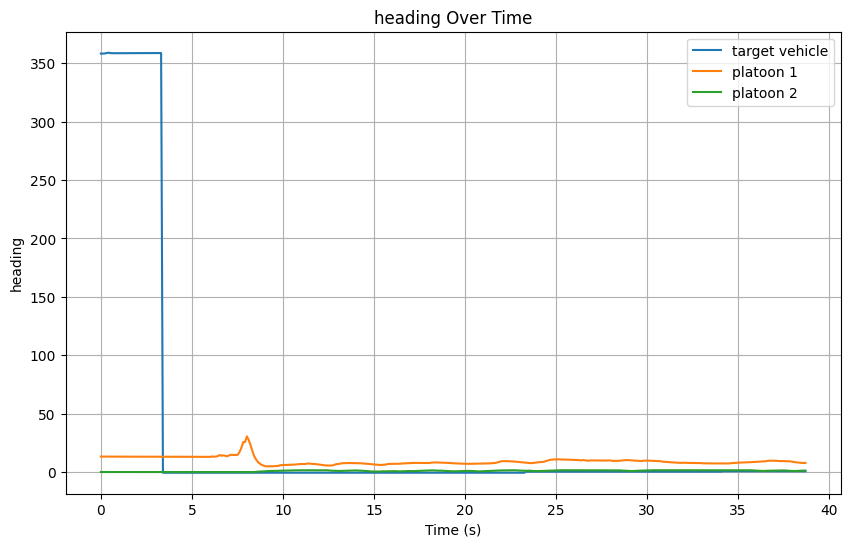

In [6]:
# plot all car headings over time
time = np.linspace(0, 0.1*len(xs1), len(xs1))
plt.figure(figsize=(10, 6))

car0_v = cars[0][:,2]
car1_v = cars[1][:,2]
car2_v = cars[2][:,3]

plt.plot(time, car0_v, label='target vehicle')
plt.plot(time, car1_v, label='platoon 1')
plt.plot(time, car2_v, label='platoon 2')
plt.legend()
plt.title('heading Over Time')
plt.xlabel('Time (s)')
plt.ylabel('heading')
plt.grid(True)
plt.show()

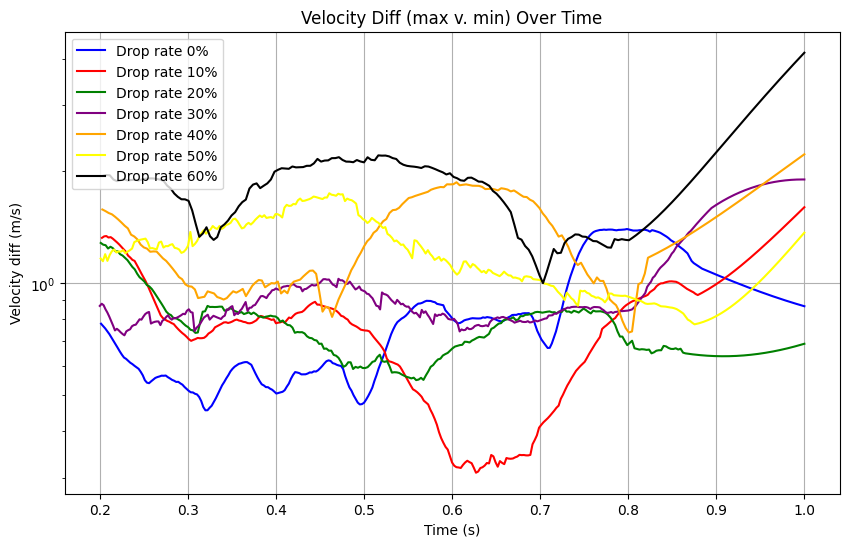

In [5]:
from scipy.signal import savgol_filter
# plot the difference between max and min velocity over time
plt.figure(figsize=(10, 6))
window_size = 99  # Window size must be odd
poly_order = 2   # Polynomial order

colors = ['blue', 'red', 'green', 'purple', 'orange', 'yellow', 'black']

for count, (car, color) in enumerate(zip(cars, colors)):
    if count == 0:
        car = special_00

    car0_v = np.expand_dims(car[0][:,3], 1)
    car1_v = np.expand_dims(car[1][:,3], 1)
    car2_v = np.expand_dims(car[2][:,3], 1)

    concat_speeds = np.concatenate((car0_v, car1_v, car2_v), axis=1)
    max_speeds = np.max(concat_speeds, axis=1)
    min_speeds = np.min(concat_speeds, axis=1)
    speed_diff = max_speeds - min_speeds
    speed_diff_smooth = savgol_filter(speed_diff, window_size, poly_order)
    
    drop_rate = int(10*count)
    time = np.linspace(0, 1, speed_diff_smooth.shape[0])
    target_time = 0.2
    s = np.searchsorted(time, target_time)
    
    plt.plot(time[s:], speed_diff_smooth[s:], label=f"Drop rate {drop_rate}%", c=color)

plt.legend()
plt.title('Velocity Diff (max v. min) Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity diff (m/s)')
plt.yscale('log')
plt.grid(True)
plt.show()

95th percentile error: 6.799814209195415
95th percentile error: 9.537891753891179
95th percentile error: 8.272048341891448
95th percentile error: 9.223480549681614
95th percentile error: 12.02846117656812
95th percentile error: 16.077934626025055
95th percentile error: 15.849749674313678


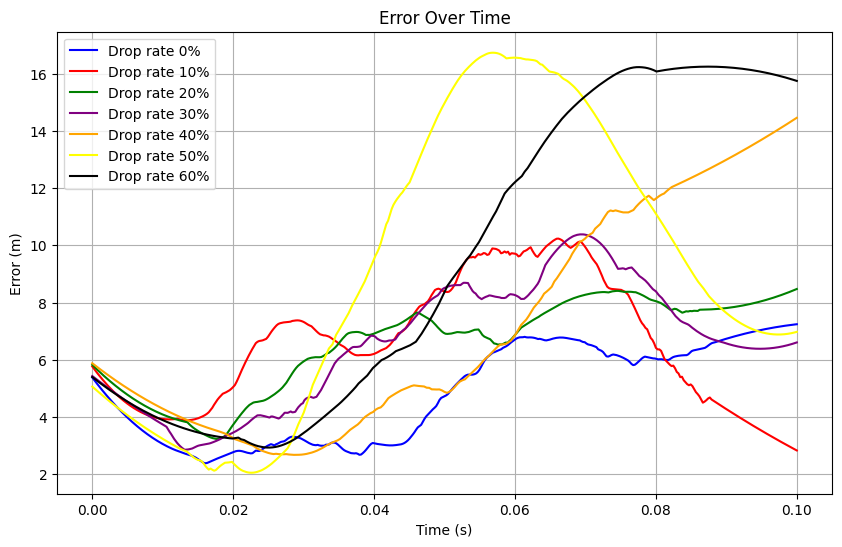

In [81]:
CAR_LENGTH = 0.779
FOLLOW_DISTANCE = 2.0

def distance_to_line(x0, y0, dx, dy, x, y):
    lambda_val = ((x - x0) * dx + (y - y0) * dy) / (dx**2 + dy**2)
    closest_point = np.array([x0 + lambda_val * dx, y0 + lambda_val * dy])
    distance = np.linalg.norm(closest_point - np.array([x, y]))
    return distance, closest_point

plt.figure(figsize=(10, 6))

for count, (car, color) in enumerate(zip(cars, colors)):
    if count == 0:
        car = special_00

    errors = np.array([])
    max_errors = np.zeros((car[0].shape[0], 1))

    for i, _ in enumerate(car):
        if i == 0:
            continue
        
        current_x = car[i][:, 0]
        current_y = car[i][:, 1]

        for j in range(0, i):
            position = i - j
            goal_follow_distance = FOLLOW_DISTANCE*position + CAR_LENGTH*(position - 1)

            # Reference car position and heading
            ref_x = car[j][:, 0]
            ref_y = car[j][:, 1]
            ref_heading = car[j][:, 2]

            # Project the current car's position onto the line defined by the reference car's position and heading
            dx = current_x - ref_x
            dy = current_y - ref_y
            
            # Compute the projection of the vector difference onto the direction of the reference car
            projected_length = dx * np.cos(ref_heading) + dy * np.sin(ref_heading)
            
            # Calculate the error as the absolute difference between the projected length and the goal follow distance
            error = np.abs(projected_length - goal_follow_distance)

            errors = np.append(errors, error)

            error = np.expand_dims(error, 1)
            max_errors = np.concatenate((max_errors, error), axis=1)
            max_errors = np.max(max_errors, axis=1)
            max_errors = np.expand_dims(max_errors, 1)


    print(f"95th percentile error: {np.percentile(errors, 95)}")
    max_errors_smooth = savgol_filter(max_errors, window_size, poly_order, axis=0)
    time = np.linspace(0, 0.1, len(max_errors_smooth))
    drop_rate = int(10*count)
    plt.plot(time, max_errors_smooth, label=f"Drop rate {drop_rate}%", c=color)

plt.legend()
plt.title('Error Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Error (m)')
plt.grid(True)
plt.show()

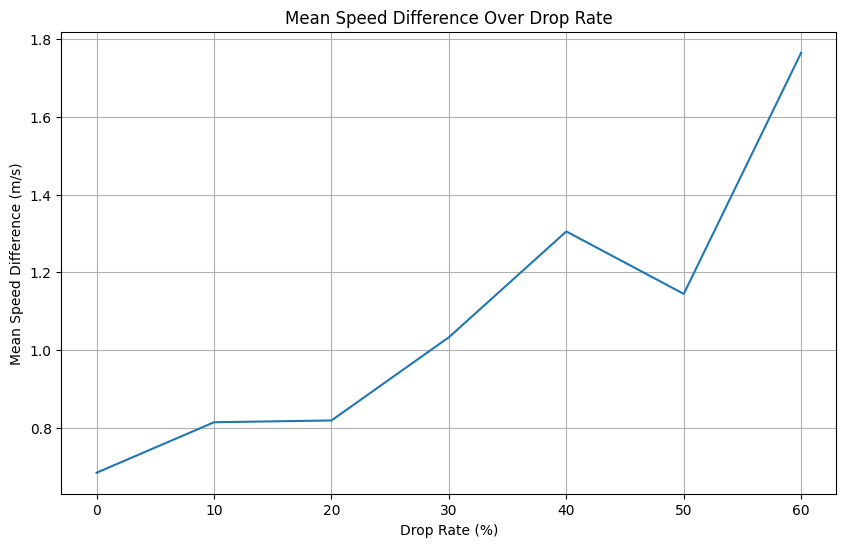

In [82]:
# mean speed difference plot

speed_diffs = []

for car in cars:
    if count == 0:
        car = special_00

    car0_v = np.expand_dims(car[0][:,3], 1)
    car1_v = np.expand_dims(car[1][:,3], 1)
    car2_v = np.expand_dims(car[2][:,3], 1)

    concat_speeds = np.concatenate((car0_v, car1_v, car2_v), axis=1)
    max_speeds = np.max(concat_speeds, axis=1)
    min_speeds = np.min(concat_speeds, axis=1)
    speed_diff = max_speeds - min_speeds

    mean_speed_diff = np.mean(speed_diff)
    speed_diffs.append(mean_speed_diff)

drop_rates = [0, 10, 20, 30, 40, 50, 60]

plt.figure(figsize=(10, 6))
plt.plot(drop_rates, speed_diffs)
plt.title('Mean Speed Difference Over Drop Rate')
plt.xlabel('Drop Rate (%)')
plt.ylabel('Mean Speed Difference (m/s)')
plt.grid(True)
plt.show()

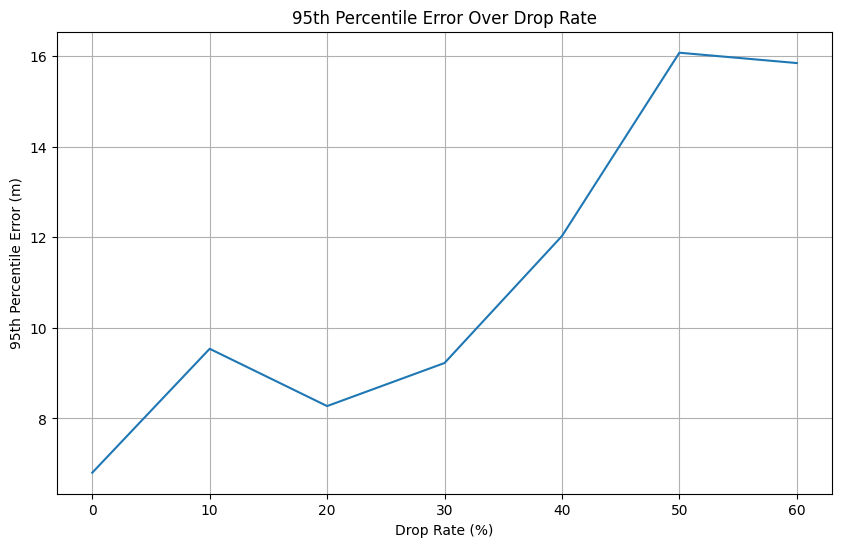

In [83]:
percentile_errors = []

for count, (car, color) in enumerate(zip(cars, colors)):
    if count == 0:
        car = special_00

    errors = np.array([])
    max_errors = np.zeros((car[0].shape[0], 1))

    for i, _ in enumerate(car):
        if i == 0:
            continue
        
        current_x = car[i][:, 0]
        current_y = car[i][:, 1]

        for j in range(0, i):
            position = i - j
            goal_follow_distance = FOLLOW_DISTANCE*position + CAR_LENGTH*(position - 1)

            # Reference car position and heading
            ref_x = car[j][:, 0]
            ref_y = car[j][:, 1]
            ref_heading = car[j][:, 2]

            # Project the current car's position onto the line defined by the reference car's position and heading
            dx = current_x - ref_x
            dy = current_y - ref_y
            
            # Compute the projection of the vector difference onto the direction of the reference car
            projected_length = dx * np.cos(ref_heading) + dy * np.sin(ref_heading)
            
            # Calculate the error as the absolute difference between the projected length and the goal follow distance
            error = np.abs(projected_length - goal_follow_distance)

            errors = np.append(errors, error)

            error = np.expand_dims(error, 1)
            max_errors = np.concatenate((max_errors, error), axis=1)
            max_errors = np.max(max_errors, axis=1)
            max_errors = np.expand_dims(max_errors, 1)

    percentile_error = np.percentile(errors, 95)
    percentile_errors.append(percentile_error)

plt.figure(figsize=(10, 6))
plt.plot(drop_rates, percentile_errors)
plt.title('95th Percentile Error Over Drop Rate')
plt.xlabel('Drop Rate (%)')
plt.ylabel('95th Percentile Error (m)')
plt.grid(True)
plt.show()